<a href="https://colab.research.google.com/github/kencbaron/BEAM-Data-Science-Fall-2019/blob/master/Lesson7v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Continuation - Linear Regression</h1>

<h2>Key Concepts</h2>

- Fit a linear model
- Goodness of fit of a regression model


<h2> Shout Outs to Colleagues </h2>

Walt H (538), Harold F and Peter T. And Aditi K, Greg S, Jinger Z, Steven K, and Xufei W



<h2>Loading Statistics Packages </h2>

As usual, we load some helpful Python statistics packages:

- Pandas is a general purpose package for data analysis, particularly datasets that are measured over time (*pan*el *da*taset*s*)
- Numpy is a package for easily manipulating matrices and includes some basic multivariate statistics and linear algebra functions
- Matplotlib is a package for plotting data


In [0]:
import pandas as pd # loading Pandas, a module for data analysis
import numpy as np # loading Numpy, a module for matrices and linear algebra
import matplotlib.pyplot as plt # loading matplotlib.pyplot, a module useful for interactiveplotting
import warnings; warnings.simplefilter('ignore')  # suppressing warnings 

In [2]:
!git clone https://@github.com/kencbaron/data # cloning an existing github repository

Cloning into 'data'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 4862 (delta 13), reused 15 (delta 5), pack-reused 4824
Receiving objects: 100% (4862/4862), 82.45 MiB | 19.84 MiB/s, done.
Resolving deltas: 100% (2339/2339), done.
Checking out files: 100% (788/788), done.


In [0]:
data_all = pd.read_csv("data/candy-power-ranking/candy-data.csv") # reading our csv dataset into the variable name data_all # using Pandas to load data


In [6]:
data_all

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


<h2>Fit a Linear Model</h2>

Our goal in this section is to find a linear model between Log GDP per capita and Life Ladder.  The linear model has the form

$$ \mathrm{LifeLadder} = a \cdot \mathrm{LogGDPPerCapita} + b $$

We call $a$ the <b>slope</b> and $b$ the <b>intercept</b>.  The animation below shows different linear models superimposed on the data.

Now we can finally see what the optimal fit is.

Optimal slope: 0.7861435287365188
Optimal intercept: -1.893938972103494


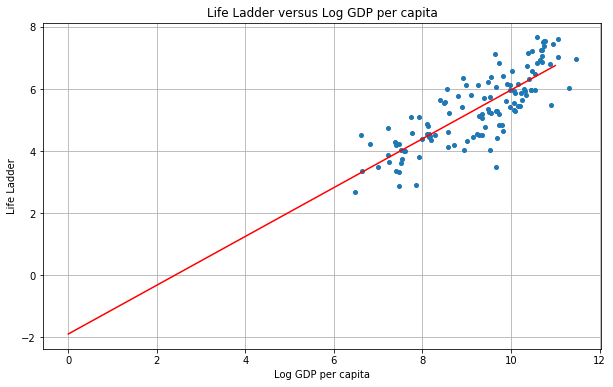

In [0]:
slope_opt = data["Log GDP per capita"].cov(data["Life Ladder"]) / data["Log GDP per capita"].var()
intercept_opt = data["Life Ladder"].mean() - slope_opt * data["Log GDP per capita"].mean()

print("Optimal slope: {}".format(slope_opt))
print("Optimal intercept: {}".format(intercept_opt))

fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder versus Log GDP per capita")
plt.grid()

xvals = np.arange(data['Log GDP per capita'].max())
yvals = slope_opt * xvals + intercept_opt
plt.plot(xvals, yvals, color="r")
fig.canvas.draw()

<h2>Checking the Goodness of Fit of our Regression </h2>

Now that we have our linear model, how do we tell if it's any good?  While we computed the slope and intercept by hand above, let's try doing this within the Python package **StatsModels**, which will give us a few extra things for free:

**StatsModels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests

In [0]:
import statsmodels.api as sm
data["Constant"] = 1
m = sm.OLS(data["Life Ladder"], data[["Log GDP per capita", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           2.28e-30
Time:                        12:36:10   Log-Likelihood:                -129.99
No. Observations:                 124   AIC:                             264.0
Df Residuals:                     122   BIC:                             269.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Log GDP per capita     0.7861      0.051     15.392      0.000       0.685       0.887
Constant              -1.8939      0.476     -3.977      0.000      -2.837      -0.951
==============================================================================
Omnibus:                        1.306   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.379
Skew:                          -0.231   Prob(JB):                        0.502
Kurtosis:                       2.769   Cond. No.                         71.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While there are lots of numbers here, a few confirm what we could probably tell from linear inspection: overall, this is a good model:

- The <b>R-squared</b>, which is the squared correlation coefficient, is 66.0%, which is pretty good for a linear model.  Just how good is given by the <b>F-statistic</b>, which roughly tells us how implausible it would be to see such a high correlation between the Log GDP per capita and Life Ladder that we happen to have here, under the assumption that there is actually no correlation between the two.  The actual probability is given by the <b>P-value</b> of the F-statistic, which is less than $10^{-29}$.  This means the probability of seeing a relationship this strong if in truth one did not exist is less than the probability that you could pick one atom out of all of the atoms in the universe.
- While the R-squared gives an idea of how good the overall linear model is, we can look at the next table to see how much the Log GDP per capita and the intercept (constant) contribute to the model.  For example, maybe we don't need to bother with a constant term at all and just looking at the $a \cdot \mathrm{(Log\ GDP\ per\ capita)}$ part of the model would be good enough.  However, the p-values on both of these variables are quite small, which tells us that both pieces of the model have a statistically significant contribution.

#### **Linear Model Assumptions and Residual Analysis**



The linear model makes two critical assumptions (there are others, but these are two of the most important):

- <b>Homoskedasticity</b>: This is a fancy way of saying that the variance of the errors is the same no matter what the value of the predictor variable is.  In other words, the predicted range of Life Ladder is about as wide a country with 100 GDP or a country with 10,000 GDP.
- <b>Independence of errors</b>: This means that knowing how much the model gets Life Ladder of one country wrong shouldn't tell us anything about how much the model gets wrong the Life Ladder of other countries.

Both of these assumptions are quite strong and **rarely hold in practice**: the goal is more to make sure they hold reasonably well.  Let's look at the residuals to see how well they hold:

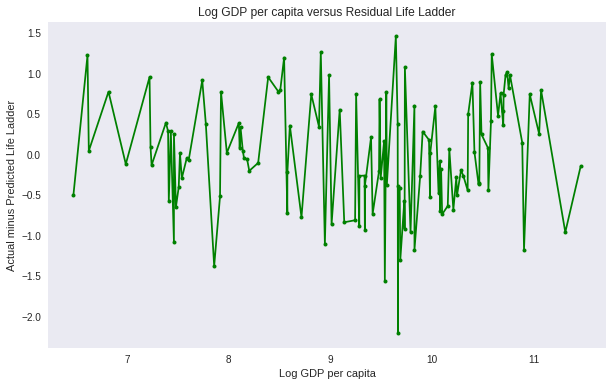

In [0]:
data["Residual"] = m.resid
data.sort_values('Log GDP per capita', inplace=True)
fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Residual"], "go-", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Actual minus Predicted Life Ladder")
plt.title("Log GDP per capita versus Residual Life Ladder")
plt.grid()

**Exercise:** Find the factor that describes happiness the best